<a href="https://colab.research.google.com/github/dev-EthanJ/Basic_Python_with_Data_Crawling/blob/main/20221107_scikit-learn_ML_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn Machine Learning Linear Regression <br> 사이킷런 머신러닝 회귀분석 

- Machine Learning Process

1. 데이터 수집: Data Collection

2. 데이터 전처리: Data pre-processing

3. 모델 학습: Training Model

4. 모델 평가:Evaluating Model

5. 모델 배포: Model Deployment

In [ ]:
import pandas as pd

## 1. Data 수집

In [ ]:
url = f'https://raw.githubusercontent.com/dev-EthanJ/scikit-learn_Machine_Learning/main/data/insurance.csv'

df = pd.read_csv(url)

df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
# 데이터가 가지고 있는 변수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- 범주형 변수 `Dtype=object` > `df.describe()`로 확인할 수 없다

In [ ]:
# pandas의 float data를 소수점 아래 2번째 자리까지 formatting
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# 기술통계
df.describe()

,age,bmi,children,expenses
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.67,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,16.00,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.70,2.00,16639.92
max,64.00,53.10,5.00,63770.43


## 2. Data pre-processing

- modeling하기 좋게 data를 다듬는다.

In [ ]:
from sklearn.linear_model  import LinearRegression

### 2.1. 범주형 Data에 대한 전처리

* 연속형 변수
    * 연속적으로 이어지는 변수
    * 데이터 간의 크고 작음을 비교하거나 사칙연산 가능
* 범주형 변수
    * 이어지는 숫자가 아닌 각 범주로 구성된 변수
    * 크거나 작다고 할 수 없으며, 평균이라는 개념 또한 존재할 수 없음 

```
😲 Object 형태로 표현된 범주형 변수로는 모델링할 수 없음
```

In [ ]:
# df.smoker object에 대한 전처리(수치화)
df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [ ]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# df.smoker == 'yes'
df.smoker.eq('yes')

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

In [ ]:
# object(str)에 대한 수치화

# df.smoker.eq('yes') * 1
df.smoker.eq('yes').mul(1)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
df.smoker = df.smoker.eq('yes').mul(1)

df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,1,southwest,16884.92
1,18,male,33.80,1,0,southeast,1725.55
2,28,male,33.00,3,0,southeast,4449.46
3,33,male,22.70,0,0,northwest,21984.47
4,32,male,28.90,0,0,northwest,3866.86


### 2.2. 더미 변수, 원-핫 인코딩

In [ ]:
df.sex.unique()

array(['female', 'male'], dtype=object)

<br>

- `obj.nuique()`: `obj.unique`의 결과 array의 item 개수

In [ ]:
print(df.region.unique())
df.region.nunique()

['southwest' 'southeast' 'northwest' 'northeast']


4

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker        int64
region       object
expenses    float64
dtype: object

<br>

- `pd.get_dummies(DataFrame, columns=[columns label list])` : columns label list를, 해당 column의 서로 다른 values를 각각 나타내는 새로운 columns가 추가된 DataFrame을 생성

  - parameter `drop_first=True`: `pd.get_dummies()`의 결과로 나온 columns중 첫 번째 column을 drop

    - 고유 value를 덜어내서 부하(계산량) 줄임

In [ ]:
df = pd.get_dummies(df, columns=['sex', 'region'], drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   smoker            1338 non-null   int64  
 4   expenses          1338 non-null   float64
 5   sex_male          1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 57.6 KB


### 얕은 복사(shallow copy) vs. 깊은 복사(deep copy)

- shallow copy: `=` 연산자

- deep copy: `.copy()` method, `object` $\rightarrow$ `str` $\rightarrow$ `object`

In [ ]:
origin_list = ['a', 'b', 'c', 'd']

copyed_list = '.'.join(origin_list).split('.')

copyed_list.append('e')

print(copyed_list)
print(origin_list)

['a', 'b', 'c', 'd', 'e']
['a', 'b', 'c', 'd']


### 2.3. 훈련셋 `train set`, 시험셋 `test set`

**데이터 분할 작업**
1. 종속변수와 독립변수 분리
2. 학습셋(Train set)과 시험셋(Test set) 분리
    * 학습용 데이터셋, 평가용 시험셋

||독립변수|종속변수|
|-|-|-|
|학습셋|X_train|y_train|
|시험셋|X_test|y_test|

#### 독립변수와 종속변수
* **독립변수**
  * 예측에 사용되는 재료와 같은 변수들
  * 피쳐 변수(Feature variable), 피쳐(Feature)
* **종속변수**
  * 예측을 하려는 대상 변수
  * 목표 변수 (Target variable), 타깃

_Why?_ : 지도 학습에 속하는 모델은 독립변수를 예측하는 것이므로, 모델링할 때 어떤 변수가 종속변수인지 명확히 알려주어야 함 → 독립변수와 종속변수를 각각 별도의 데이터로 입력 받음

- `train set`과 `test set`을 나누는 이유:

  - `train set`으로 훈련 된 결과로 만들어진 모델을 가지고 시험을 하면 `train set`에 대해서는 맞출 수 밖에 없음

  - 학습셋과 시험셋을 구분하지 않고 예측 모델을 만들 경우 새로운 데이터에 대한 예측력을 검증할 수 없음

    - 전체 데이터를 가지고 모델링(학습)을 하고, 또 다시 전체 데이터에 대해서 예측값을 만들어서 종속변수와 비교했기 때문에 특정 데이터에 대해 과최적 되었을 수 있음

    - 시험셋을 통해 검증하지 않은 상태라는 불확실성을 줄일 수 있음
    
      - Data의 일부를 `test set`으로 독립시켜서, `train set`과 `test set`을 나눈다.

      - 일반적으로 **train set:test set**을 각각 7:3, 8:2 정도로 나눔 (전체 데이터가 적을 경우 학습셋을 우선시)

In [ ]:
df.columns

Index(['age', 'bmi', 'children', 'smoker', 'expenses', 'sex_male',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
# X: 독립변수, y: 종속변수
X = df.drop('expenses', axis=1)
y = df.expenses

- 사이킷런 import

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [ ]:
# test_size: 비율 > test set(시험셋)의 ratio
# random_state: seed value > 임의로 결정되는 값을 특정 값으로 유지되게 하는 값

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 200
)

len(train_test_split(X, y, test_size = 0.2, random_state=200))

4

## 3. 모델 학습

- Modeling

  - 머신러닝 알고리즘으로 모델을 학습시키는 과정 → 결과물 : 머신러닝 모델

  - 모델링에 사용할 머신러닝 알고리즘을 선택

  - 독립변수와 종속변수를 *fit()* 함수에 인수로 주어 학습

|알고리즘 선택| |모델 생성| |모델 학습| |모델을 사용한 예측|
|-|-|-|-|-|-|-|
|다양한 머신러닝<br>알고리즘 중 선택 후<br>라이브러리 임포트|→|모델링에 사용할<br>모델 생성|→|*fit()* 함수에 학습셋의<br>독립변수와 종속변수를<br>인수로 대입|→|train_test_split()<br>함수에 평가셋의 <br>독립변수를 인수로 대입

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

### 3.1. `model.fit(X_train, y_train)`

- 모델을 학습시키는 함수 : Data를 Model안에 넣어서 독립변수`X_train`과 종속변수`y_train`간의 관계들 분석,   
새로운 Data를 예측할 수 있도록 학습시킴

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

### 3.2. `model.predict(X_test)`

- 모델을 활용해서 예측

In [ ]:
pred = model.predict(X_test)

pred

array([11583.75098752,  8723.46560984,  7794.17799753,  8537.18904201,
        1900.99306943,  5000.1965654 , 40184.13707971,  4332.65458179,
       33604.62827378,  8566.77438349, 34761.58427257, 10617.81670868,
        9203.54356439,  6425.0666393 , 14236.30630426,  5926.50264561,
       15334.62115765, 27775.22335916, 11729.02225496, 10502.41605544,
       10966.06403594,  2757.84040418, 11719.86336504, 34984.82793476,
        5779.75874448,  -144.15498223, 25007.46443988, 10374.70604051,
        8619.47240785, 40243.70301175, 18891.94370162, 12035.16897936,
        5042.03755231,  3137.62318663,  4433.98245405,  9068.79116388,
       12923.54652222,  -601.63917125, 13236.88773829,  1919.81372069,
       30080.74972726, 38498.04504965, 28122.74348022, 12606.12034078,
       11730.91113956, 11933.2727501 , 16303.21034674, 12627.02280213,
        -338.02188294, 14181.44145783, 32937.55388043, 13037.92391076,
       16870.81536476, 33940.65858658, 13331.7608698 , 38656.52249415,
      

## 4. 모델 평가

- 👀 예측 모델 평가
  
  - 테이블로 평가
  
  - 그래프로 평가 ✔
  
  - 통계적 방법으로 평가 (RMSE) ✔✔✔

### 4.1. 테이블로 평가

In [ ]:
# 두 데이터를 비교해서 정확도 확인
comparison = pd.DataFrame({'actual':y_test, 'pred':pred})

X_test.head()

,age,bmi,children,smoker,sex_male,region_northwest,region_southeast,region_southwest
992,50,31.60,2,0,0,0,0,1
937,39,24.20,5,0,0,1,0,0
688,47,24.10,1,0,0,0,0,1
1185,45,23.60,2,0,1,0,0,0
1137,26,22.20,0,0,0,1,0,0


In [ ]:
comparison.head()

,actual,pred
992,10118.42,11583.75
937,8965.80,8723.47
688,26236.58,7794.18
1185,8603.82,8537.19
1137,3176.29,1900.99


- 한 눈에 비교하기 어려움

### 4.2. 그래프로 평가

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

- 산점도 그리기: `sns.scatterplot()`

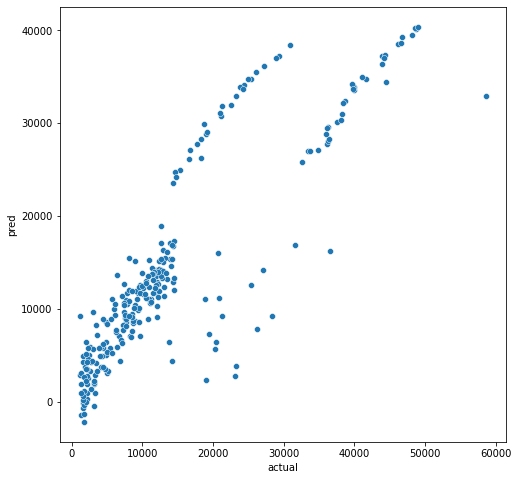

In [ ]:
# 사이즈 설정
plt.figure(figsize=(8, 8))

sns.scatterplot(x='actual', y='pred', data=comparison)
plt.show()

### 4.3. RMSE & R²(결정계수)

|평가지표|설명|
|-|-|
|MAE (Mean Absolute Error, 평균 절대 오차)|- 실젯값과 예측값 사이의 오차에 절댓값을 씌운 뒤 이에 대한 평균을 계산<br>- 0에 가까울수록 좋음|
|MSE (Mean Squared Error, 평균 제곱 오차)|- 실젯값과 예측값 사이의 오차를  제곱한 뒤 이에 대한 평균을 계산<br>- 0에 가까울수록 좋음|
|RMSE (Root Mean Absolute Error, 루트 평균 제곱 오차)<br>|- MSE에 루트를 씌운 값<br>- 0에 가까울수록 좋음<br>- 연속형 변수를 예측할 때 가장 일반적으로 사용되는 평가지표|
|R²|- 결정계수<br>- 독립변수가 종속변수를 얼마만큼 설명해 주는지 나타내는 지표, 즉 설명력<br>- 1에 가까울수록 좋음|

- `mean_squared_error(y_test, pred)`

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# MSE(평균제곱오차): 예측값과 실제값 사이의 오차의 제곱의 평균
mean_squared_error(y_test, pred)

36760484.5645236

In [ ]:
# RMSE(평균제곱근오차): Root MSE
# mean_squared_error(y_test, X_pred) ** 0.5
mean_squared_error(y_test, pred, squared=False)

6063.042517129795

- `model.score(X_train, y_train)`

- $R^2 = \frac{SSR}{SST}$

  - **SST** (Sum of Squares Total) : 총변동

  - **SSR** (Sum of Squares Regression) : 설명 가능한 변동

    - 모델이 얼마나 값의 변동을 잘 설명하는가? = 예측을 잘하는가?

In [ ]:
# R^2 = 결정계수: 모델이 얼마나 종속변수-독립변수의 변동을 잘 설명하는가(예측 정확도)를 수치화한 값
R_squared = model.score(X_train, y_train)

R_squared

0.7462462636958302

- `model.coef_`: 독립변수별 계수

In [ ]:
model.coef_

array([  262.45023678,   326.77442073,   551.41412416, 23798.72509414,
         -77.28662589,  -166.61566228,  -795.09255719,  -957.17123014])

In [ ]:
pd.Series(model.coef_, index=X.columns)

age                  262.45
bmi                  326.77
children             551.41
smoker             23798.73
sex_male             -77.29
region_northwest    -166.62
region_southeast    -795.09
region_southwest    -957.17
dtype: float64

- `model.intercept_`: 모델의 y절편 확인

In [ ]:
model.intercept_

-12010.489564845571

## 5. 모델 배포

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# joblib 라이브러리를 통해 .pkl 파일 생성
import joblib

joblib.dump(model, 'first_model.pkl')

['first_model.pkl']

In [ ]:
# .pkl file로 파일단위 머신러닝 모델 이동 가능
model_from_joblib = joblib.load('first_model.pkl')

pd.Series(model_from_joblib.coef_, index=X.columns)

age                  262.45
bmi                  326.77
children             551.41
smoker             23798.73
sex_male             -77.29
region_northwest    -166.62
region_southeast    -795.09
region_southwest    -957.17
dtype: float64